<a href="https://colab.research.google.com/github/AndreiAf02/Transfer_Learning_Fine_Tuning_Update/blob/main/Adult_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import seaborn as sns
import pandas as pd

In [2]:
path_to_data2 = 'https://raw.githubusercontent.com/AndreiAf02/Transfer_Learning_Fine_Tuning_Update/main/'

In [3]:
def perf_metrics(data, label):
    data_len = len(data)
    # print('Number of iterations:', data_len)
    mean = np.mean(data[label])
    var = np.var(data[label], ddof=1)
    var_mean = var/data_len

    se_mean = np.sqrt(var_mean)
    error_bound = 1.96*se_mean
    CI_low = mean - error_bound
    CI_high = mean + error_bound

    print('Error type:', label)
    print('Mean:', mean)
    print('Variance:', var)
    print('Variance of estimate:', var_mean)
    print('Standard error:', se_mean)
    print('95% Confidence Interval:  [', CI_low, ', ', CI_high, ']')
    print('-----------------------------')


Loading the performance data for the six sampling methods (plus original imbalanced data) collected from fine-tuning for heart disease prediction:

In [35]:
# data_orig = pd.read_csv(path_to_data+"Adult_Imbalanced_Fine_Tuning.csv", sep=",", header=0)
# data_SRS = pd.read_csv(path_to_data+"Adult_SRS_Fine_Tuning.csv", sep=",", header=0)
# data_SRSwR = pd.read_csv(path_to_data+"Adult_SRSwR_Fine_Tuning.csv", sep=",", header=0)
# data_Sy = pd.read_csv(path_to_data+"Adult_Sy_Fine_Tuning.csv", sep=",", header=0)
# data_Sym = pd.read_csv(path_to_data+"Adult_Sy_multi_Fine_Tuning.csv", sep=",", header=0)
# data_SRS_ROS = pd.read_csv(path_to_data+"Adult_SRS_ROS_Fine_Tuning.csv", sep=",", header=0)
# data_Sy_ROS = pd.read_csv(path_to_data+"Adult_Sy_ROS_Fine_Tuning.csv", sep=",", header=0)

data_orig = pd.read_csv(path_to_data2+"Adult_Imbalanced_Fine_Tuning_5_20.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data2+"Adult_SRS_Fine_Tuning_Extension.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data2+"Adult_SRSwR_Fine_Tuning_Extension.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data2+"Adult_Sy_Fine_Tuning_Extension.csv", sep=",", header=0)
data_Sym = pd.read_csv(path_to_data2+"Adult_Sy_multi_Fine_Tuning_Extension.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data2+"Adult_SRS_ROS_Fine_Tuning_Extension.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data2+"Adult_Sy_ROS_Fine_Tuning_Extension.csv", sep=",", header=0)



# data_orig

Original (imbalanced) data performance:

In [36]:
data_orig

,Unnamed: 0,FPR,FNR
0,0,0.009670,0.866667
1,1,0.000000,0.982609
2,2,0.004656,0.927536
3,3,0.000000,0.976812
4,4,0.001433,0.924638
...,...,...,...
95,95,0.003582,0.915942
96,96,0.011819,0.855072
97,97,0.010745,0.849275
98,98,0.004656,0.901449


Error type: FPR
Mean: 0.005225644699140347
Variance: 1.7252368576198015e-05
Variance of estimate: 1.7252368576198016e-07
Standard error: 0.0004153597064737746
95% Confidence Interval:  [ 0.004411539674451749 ,  0.006039749723828945 ]
-----------------------------
Error type: FNR
Mean: 0.8940869565217392
Variance: 0.0033284612561235135
Variance of estimate: 3.3284612561235136e-05
Standard error: 0.005769281806363348
95% Confidence Interval:  [ 0.882779164181267 ,  0.9053947488622114 ]
-----------------------------


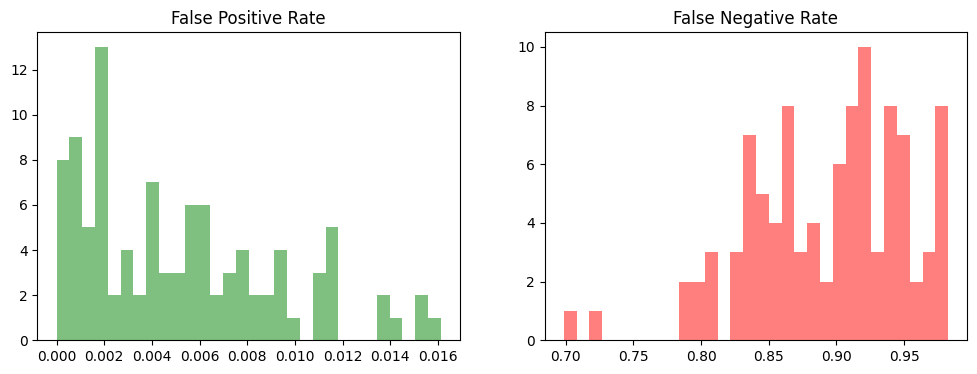

In [37]:
data = data_orig

orig_FPR = data['FPR']
orig_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

## Random Undersampling (RUS):

SRS Random Undersampling performance:

Error type: FPR
Mean: 0.13893803724932663
Variance: 0.0016951547339664262
Variance of estimate: 8.47577366983213e-06
Standard error: 0.002911318201405015
95% Confidence Interval:  [ 0.1332318535745728 ,  0.14464422092408047 ]
-----------------------------
Error type: FNR
Mean: 0.4318260869623189
Variance: 0.008480711476715483
Variance of estimate: 4.240355738357742e-05
Standard error: 0.006511801393130584
95% Confidence Interval:  [ 0.41906295623178297 ,  0.4445892176928548 ]
-----------------------------


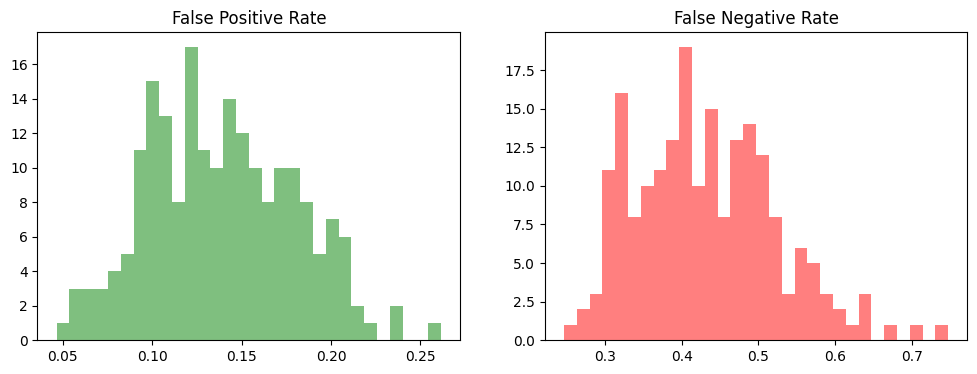

In [38]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

SRSwR undersampling performance:

Error type: FPR
Mean: 0.14452542979434096
Variance: 0.0015380476162658236
Variance of estimate: 7.690238081329117e-06
Standard error: 0.0027731278516017104
95% Confidence Interval:  [ 0.1390900992052016 ,  0.14996076038348033 ]
-----------------------------
Error type: FNR
Mean: 0.40443478261246374
Variance: 0.0049978867236583815
Variance of estimate: 2.498943361829191e-05
Standard error: 0.004998943250157168
95% Confidence Interval:  [ 0.3946368538421557 ,  0.4142327113827718 ]
-----------------------------


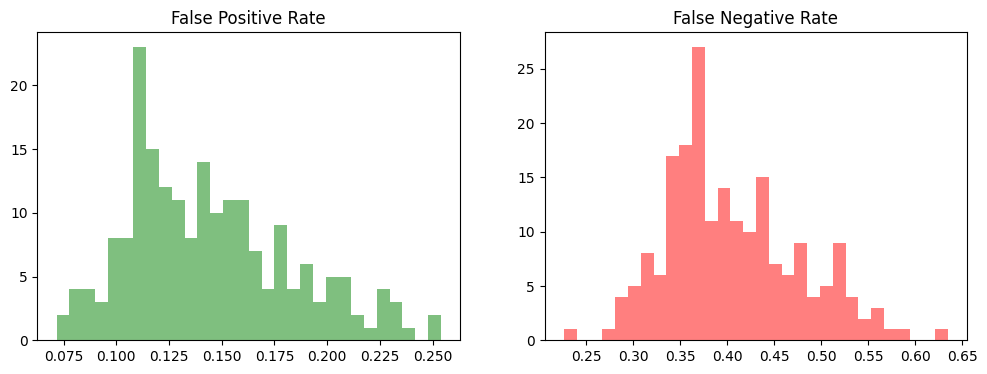

In [39]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.1441672636011461
Variance: 0.0024720189051769307
Variance of estimate: 1.2360094525884653e-05
Standard error: 0.003515692609697932
95% Confidence Interval:  [ 0.13727650608613814 ,  0.15105802111615405 ]
-----------------------------
Error type: FNR
Mean: 0.41921739130782604
Variance: 0.010174317080994035
Variance of estimate: 5.0871585404970174e-05
Standard error: 0.007132431941839345
95% Confidence Interval:  [ 0.4052378247018209 ,  0.43319695791383117 ]
-----------------------------


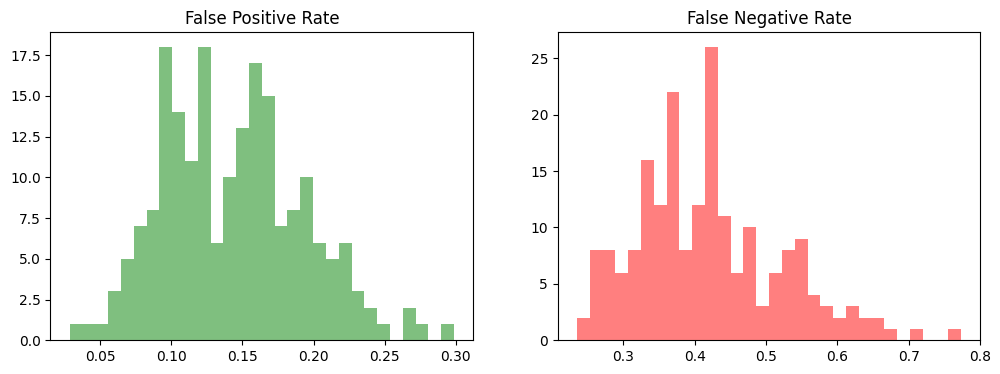

In [40]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Multiple Systematic undersampling performance:

Error type: FPR
Mean: 0.1498943409788968
Variance: 0.001686195834019832
Variance of estimate: 8.430979170099161e-06
Standard error: 0.0029036148453435006
95% Confidence Interval:  [ 0.14420325588202354 ,  0.15558542607577008 ]
-----------------------------
Error type: FNR
Mean: 0.4764492753594202
Variance: 0.015846038635582017
Variance of estimate: 7.923019317791008e-05
Standard error: 0.008901134375904573
95% Confidence Interval:  [ 0.45900305198264724 ,  0.4938954987361932 ]
-----------------------------


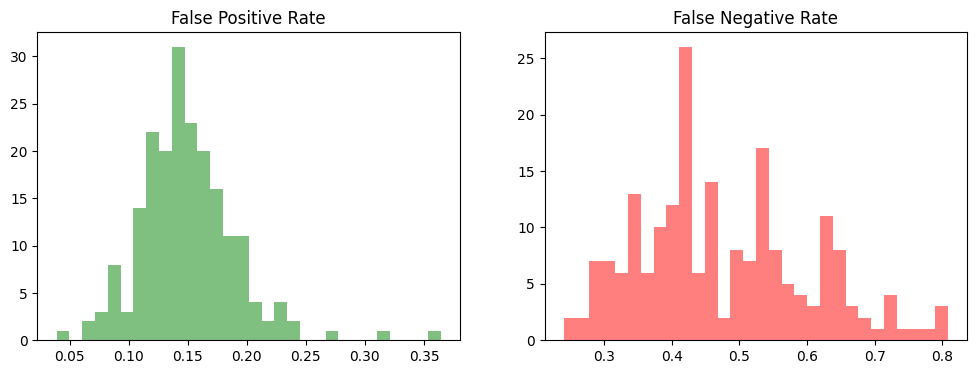

In [41]:
data = data_Sym

Sym_FPR = data['FPR']
Sym_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

## Random Oversampling (ROS):

SRS Oversampling performance:

Error type: FPR
Mean: 0.1309509312282521
Variance: 0.0009697044620618898
Variance of estimate: 4.848522310309449e-06
Standard error: 0.0022019360368342785
95% Confidence Interval:  [ 0.1266351365960569 ,  0.1352667258604473 ]
-----------------------------
Error type: FNR
Mean: 0.37765217391507244
Variance: 0.004463957257622658
Variance of estimate: 2.2319786288113288e-05
Standard error: 0.0047243821064889835
95% Confidence Interval:  [ 0.368392384986354 ,  0.38691196284379087 ]
-----------------------------


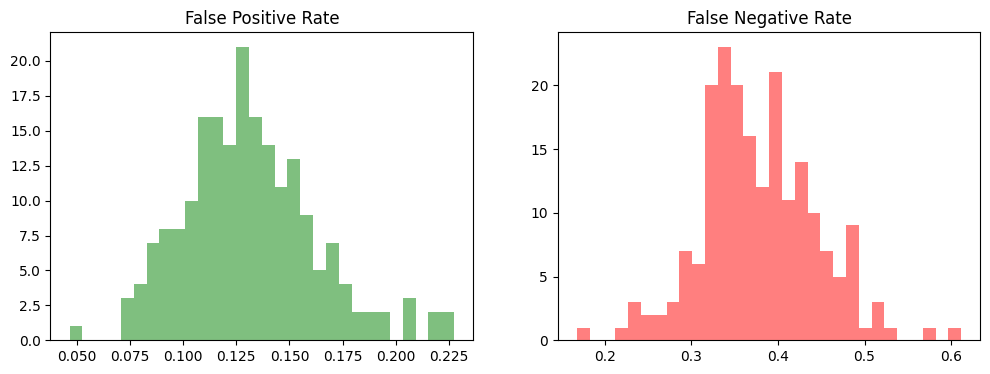

In [42]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Resampling performance:

Error type: FPR
Mean: 0.12716332377382517
Variance: 0.000975545095369464
Variance of estimate: 4.8777254768473205e-06
Standard error: 0.002208557329309638
95% Confidence Interval:  [ 0.12283455140837828 ,  0.13149209613927207 ]
-----------------------------
Error type: FNR
Mean: 0.38913043478376813
Variance: 0.0057734376560897365
Variance of estimate: 2.8867188280448683e-05
Standard error: 0.0053728193977137075
95% Confidence Interval:  [ 0.37859970876424925 ,  0.399661160803287 ]
-----------------------------


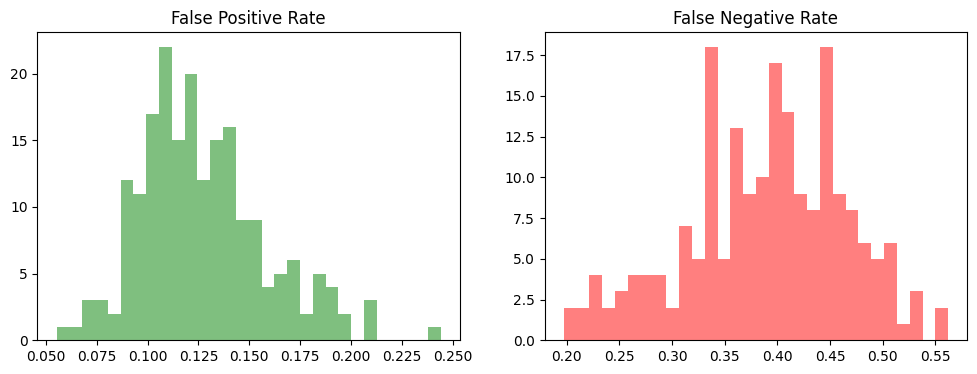

In [43]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

In [44]:
FPR = pd.DataFrame()

DF = FPR


DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sym_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR
DF['Orig'] = orig_FPR
FPR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.160817,0.142908,0.093123,0.108883,0.114613,0.122135,0.009670
1,0.143983,0.172636,0.093481,0.313754,0.116404,0.139685,0.000000
2,0.114971,0.113181,0.090616,0.087034,0.128223,0.067693,0.004656
3,0.172994,0.120702,0.123926,0.124284,0.110315,0.182307,0.000000
4,0.149355,0.118911,0.126791,0.069484,0.222779,0.125358,0.001433
...,...,...,...,...,...,...,...
195,0.151504,0.109957,0.179083,0.272206,0.167980,0.198782,NaN
196,0.177650,0.177292,0.155086,0.230301,0.157235,0.110315,NaN
197,0.132880,0.186963,0.159742,0.114613,0.129298,0.117479,NaN
198,0.142908,0.093481,0.221705,0.201648,0.103868,0.169413,NaN


<Axes: title={'center': 'FPR'}>

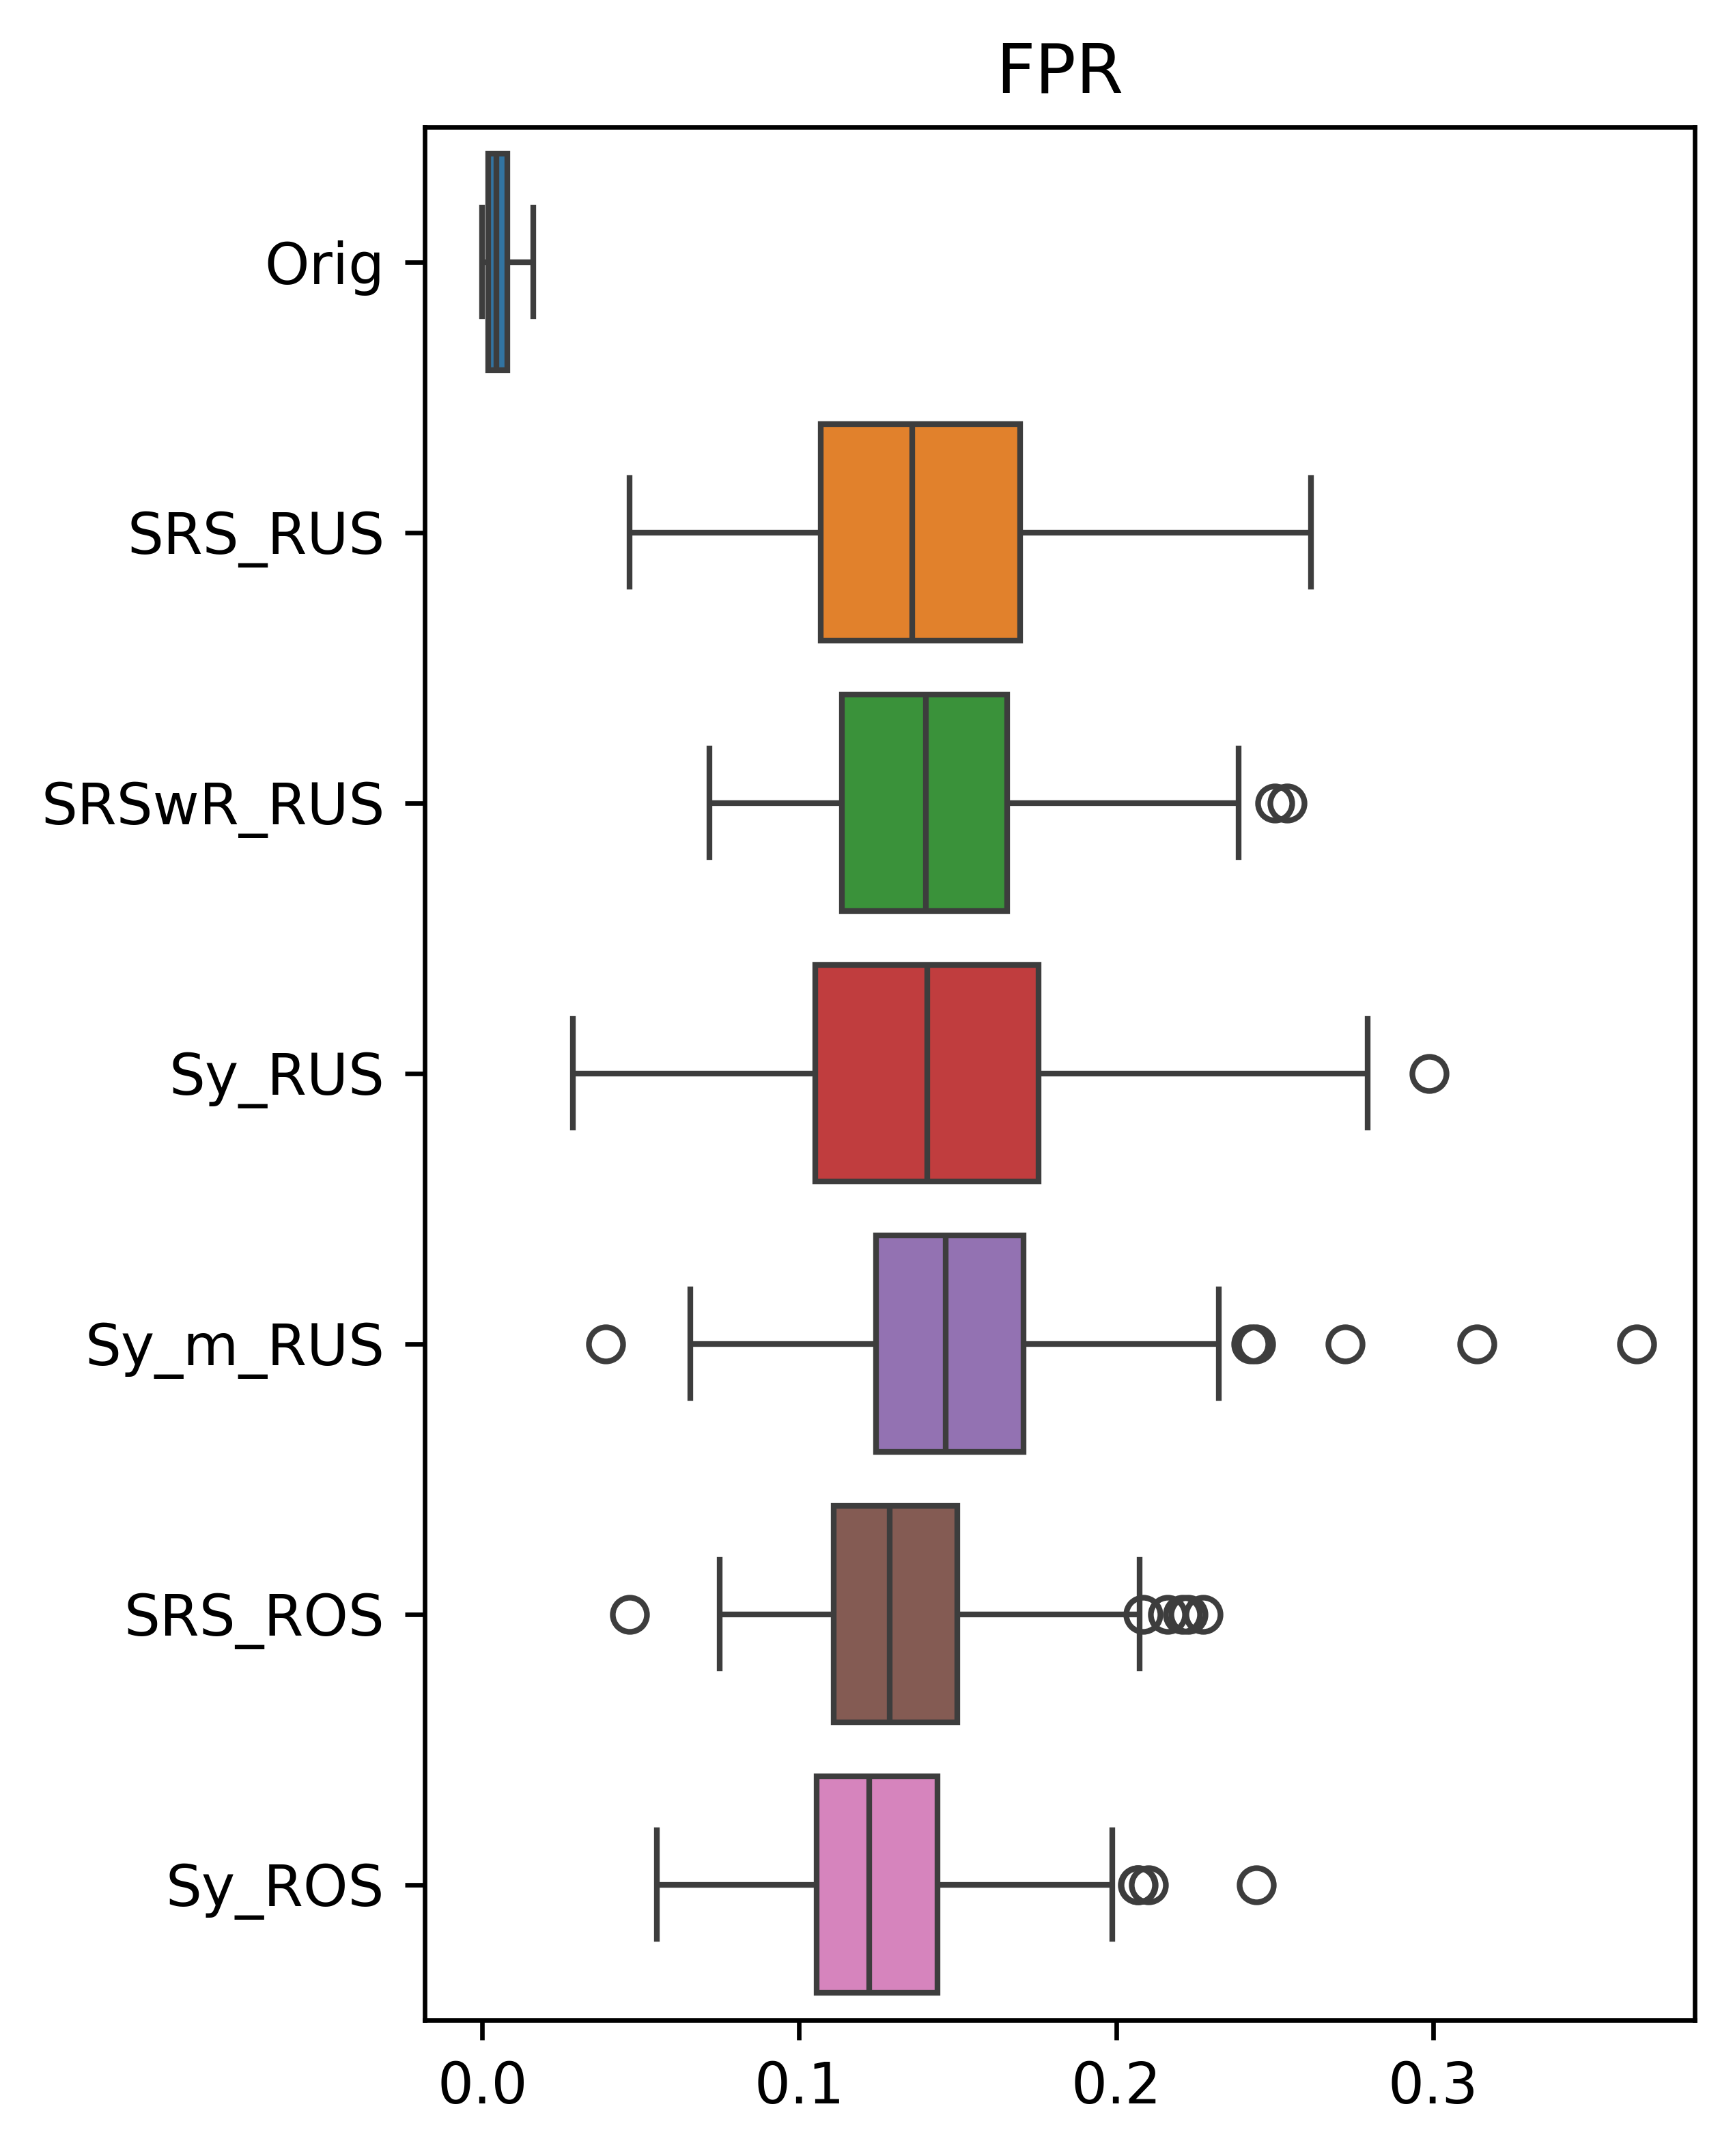

In [45]:
dataset = FPR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [46]:
FNR = pd.DataFrame()

DF = FNR


DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sym_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR
DF['Orig'] = orig_FNR
FNR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.446377,0.484058,0.371014,0.649275,0.391304,0.440580,0.866667
1,0.469565,0.437681,0.373913,0.339130,0.339130,0.408696,0.982609
2,0.515942,0.544928,0.373913,0.730435,0.324638,0.553623,0.927536
3,0.408696,0.515942,0.318841,0.631884,0.350725,0.342029,0.976812
4,0.455072,0.524638,0.310145,0.808696,0.237681,0.428986,0.924638
...,...,...,...,...,...,...,...
195,0.339130,0.440580,0.344928,0.240580,0.336232,0.324638,NaN
196,0.313043,0.307246,0.405797,0.275362,0.365217,0.510145,NaN
197,0.371014,0.318841,0.394203,0.440580,0.394203,0.478261,NaN
198,0.350725,0.475362,0.286957,0.295652,0.472464,0.376812,NaN


<Axes: title={'center': 'FNR'}>

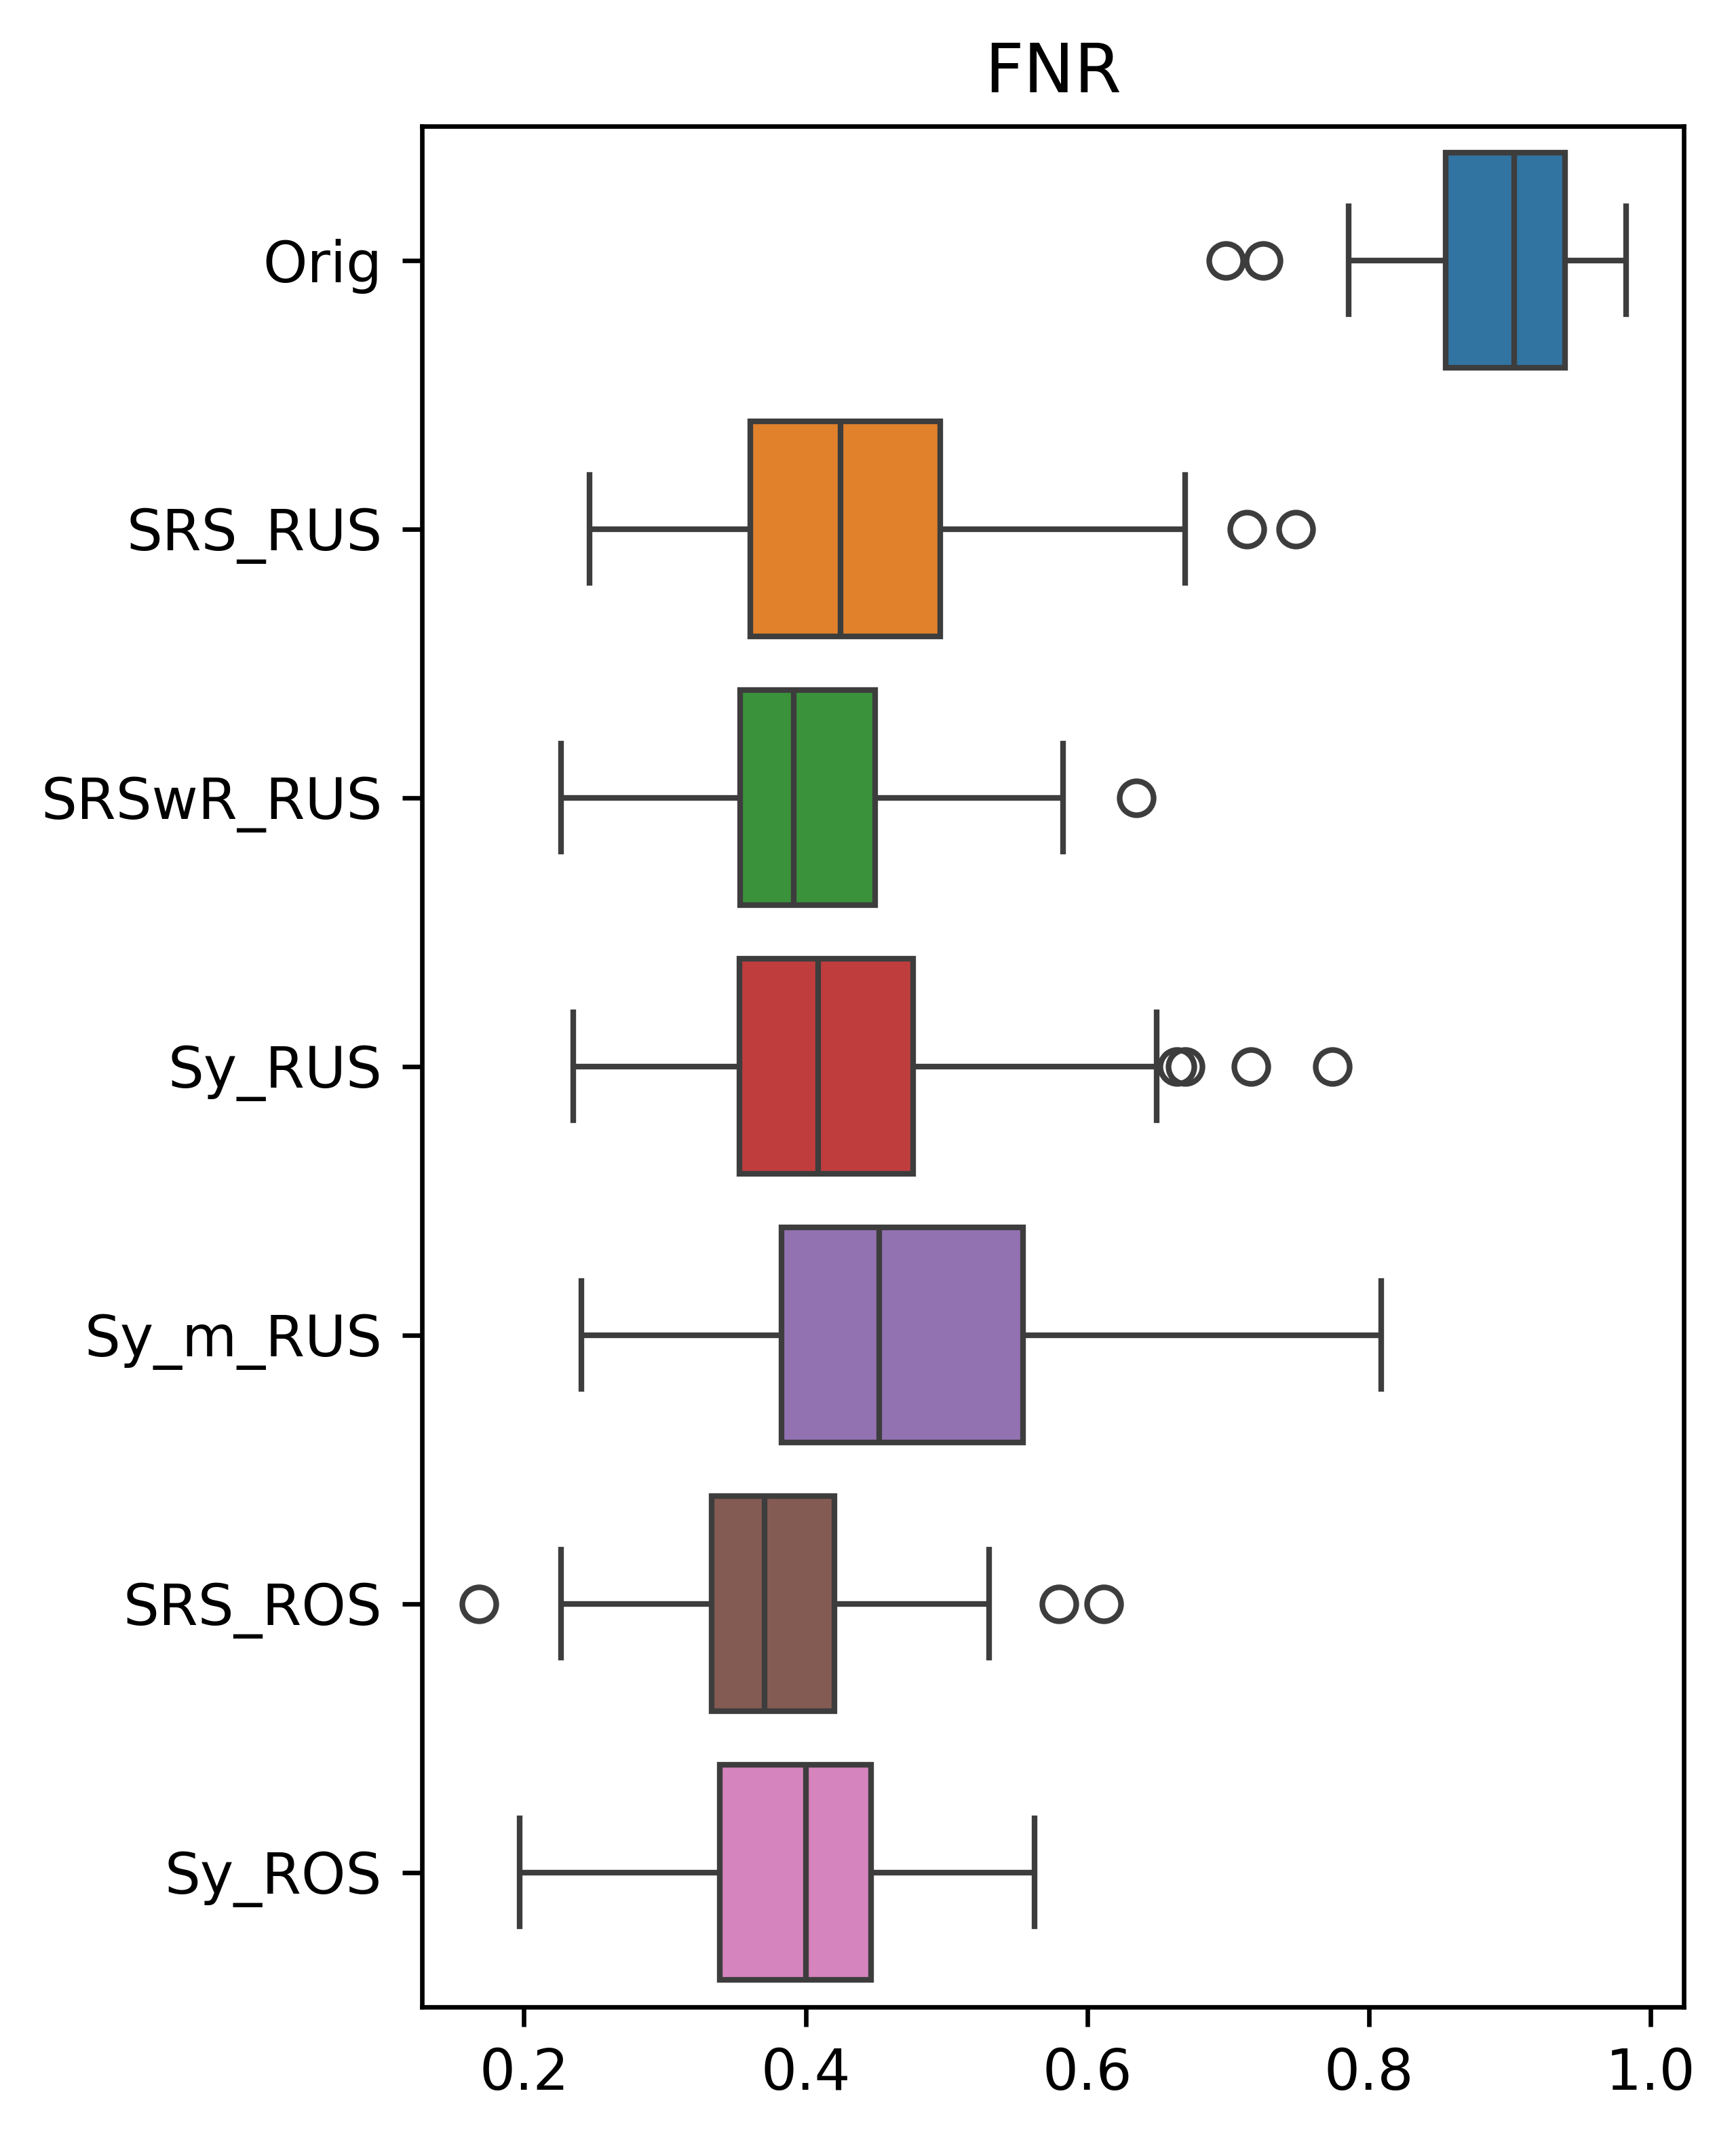

In [47]:
dataset = FNR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

## Transductive TL performance:

In [23]:
data_orig = pd.read_csv(path_to_data2+"Adult_Imbalanced.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data2+"Adult_SRS_RUS_Extended.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data2+"Adult_SRSwR_RUS_Extended.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data2+"Adult_Sy_RUS_Extended.csv", sep=",", header=0)
data_Sy2 = pd.read_csv(path_to_data2+"Adult_Sy2_RUS_Extended.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data2+"Adult_SRS_ROS_Extended.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data2+"Adult_Sy_ROS_Extended.csv", sep=",", header=0)

data_SRS

,Unnamed: 0,Source time,FPR,TPR,FNR,TNR,Target time
0,0,18.303071,0.124892,0.506336,0.493664,0.875108,1.793025
1,1,16.633857,0.223114,0.635945,0.364055,0.776886,1.199840
2,2,17.355280,0.032765,0.392857,0.607143,0.967235,1.715382
3,3,18.062277,0.062303,0.338710,0.661290,0.937697,1.207519
4,4,15.994438,0.054130,0.516129,0.483871,0.945870,1.779479
...,...,...,...,...,...,...,...
95,45,26.469433,0.121881,0.685484,0.314516,0.878119,1.935004
96,46,30.762998,0.003226,0.139401,0.860599,0.996774,1.749799
97,47,29.523205,0.009607,0.285138,0.714862,0.990393,2.137029
98,48,27.659301,0.004588,0.228111,0.771889,0.995412,2.217738


Original (imbalanced) dataset:

In [24]:
print('SRS RUS', len(data_SRS))
print('SRSwR RUS', len(data_SRSwR))
print('Sy RUS', len(data_Sy))
print('Sym RUS', len(data_Sy2))
print('SRS ROS', len(data_SRS_ROS))
print('Sy ROS', len(data_Sy_ROS))



SRS RUS 100
SRSwR RUS 100
Sy RUS 100
Sym RUS 100
SRS ROS 100
Sy ROS 100


In [25]:
orig_FPR = data_orig['FPR']
orig_FNR = data_orig['FNR']
orig_time = data_orig['Source time']


Error type: FPR
Mean: 0.026780900487525044
Variance: 0.002291315120351748
Variance of estimate: 4.582630240703496e-05
Standard error: 0.006769512715626949
95% Confidence Interval:  [ 0.013512655564896224 ,  0.040049145410153864 ]
-----------------------------
Error type: FNR
Mean: 0.7438824884792626
Variance: 0.02575224046540615
Variance of estimate: 0.000515044809308123
Standard error: 0.022694598681362994
95% Confidence Interval:  [ 0.6994010750637911 ,  0.7883639018947342 ]
-----------------------------
Error type: Source time
Mean: 31.093334453439958
Variance: 28.537780406576783
Variance of estimate: 0.5707556081315357
Standard error: 0.7554836915060018
95% Confidence Interval:  [ 29.612586418088195 ,  32.574082488791724 ]
-----------------------------


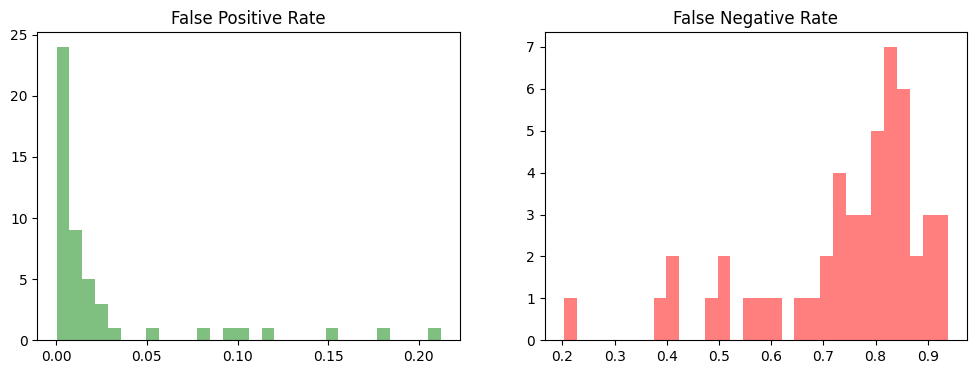

In [26]:
data = data_orig

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

##Random Undersampling (RUS):

SRS undersampling performance:

Error type: FPR
Mean: 0.05816317750000285
Variance: 0.005806332764895927
Variance of estimate: 5.806332764895927e-05
Standard error: 0.0076199296354336025
95% Confidence Interval:  [ 0.04322811541455299 ,  0.07309823958545271 ]
-----------------------------
Error type: FNR
Mean: 0.6320046082840092
Variance: 0.03987724486835674
Variance of estimate: 0.0003987724486835674
Standard error: 0.0199692876358564
95% Confidence Interval:  [ 0.5928648045177306 ,  0.6711444120502877 ]
-----------------------------
Error type: Source time
Mean: 23.55826406953004
Variance: 12.974560924647895
Variance of estimate: 0.12974560924647893
Standard error: 0.36020217829224593
95% Confidence Interval:  [ 22.85226780007724 ,  24.26426033898284 ]
-----------------------------


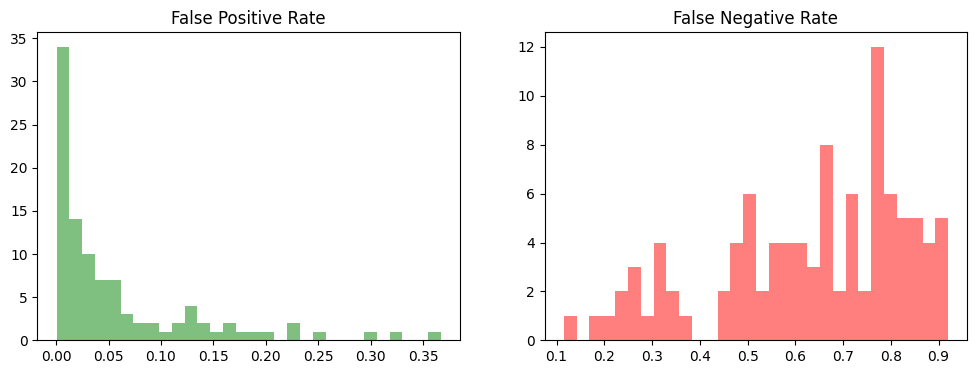

In [27]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']
SRS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

SRSwR Undersampling performance:

Error type: FPR
Mean: 0.06733725263455118
Variance: 0.013150712693856724
Variance of estimate: 0.00013150712693856724
Standard error: 0.011467655686258078
95% Confidence Interval:  [ 0.044860647489485345 ,  0.089813857779617 ]
-----------------------------
Error type: FNR
Mean: 0.6250864055187556
Variance: 0.05169338546222686
Variance of estimate: 0.0005169338546222686
Standard error: 0.022736179420084383
95% Confidence Interval:  [ 0.5805234938553903 ,  0.669649317182121 ]
-----------------------------
Error type: Source time
Mean: 22.80153695944
Variance: 12.420702243012961
Variance of estimate: 0.12420702243012961
Standard error: 0.35243016674247624
95% Confidence Interval:  [ 22.110773832624748 ,  23.492300086255252 ]
-----------------------------


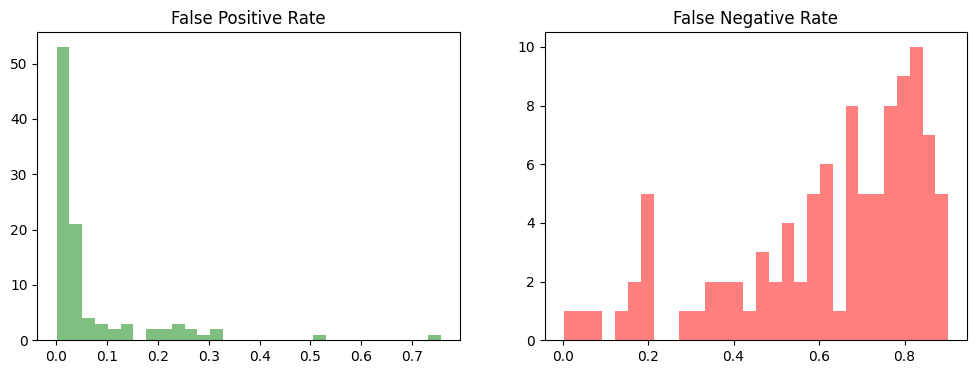

In [28]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']
SRSwR_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.05124677376065384
Variance: 0.006610672732790344
Variance of estimate: 6.610672732790344e-05
Standard error: 0.00813060436424645
95% Confidence Interval:  [ 0.035310789206730794 ,  0.06718275831457689 ]
-----------------------------
Error type: FNR
Mean: 0.6648329493178341
Variance: 0.03916784817638048
Variance of estimate: 0.00039167848176380475
Standard error: 0.019790868646014623
95% Confidence Interval:  [ 0.6260428467716455 ,  0.7036230518640227 ]
-----------------------------
Error type: Source time
Mean: 23.010542003650027
Variance: 10.333364818041618
Variance of estimate: 0.10333364818041618
Standard error: 0.321455515087883
95% Confidence Interval:  [ 22.380489194077775 ,  23.64059481322228 ]
-----------------------------


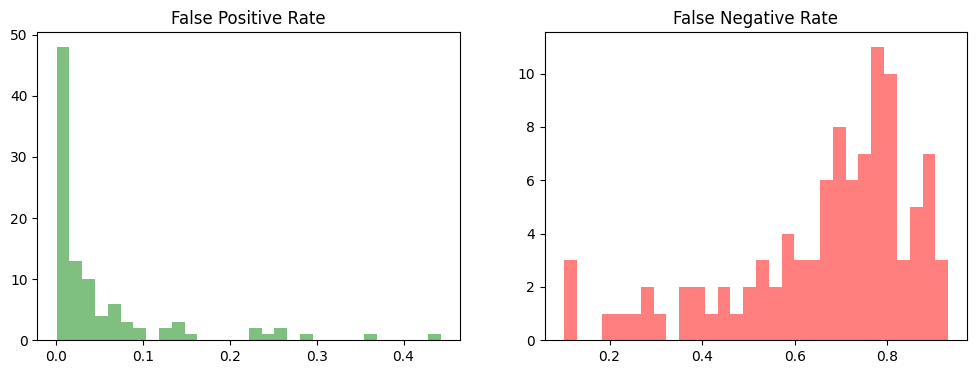

In [29]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']
Sy_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Multiple Systematic Undersampling performance:

In [30]:
data_Sy2

,Unnamed: 0,Source time,FPR,TNR,FNR,TPR,Target time
0,0,15.716550,0.004373,0.995627,0.820853,0.179147,1.162152
1,1,16.782630,0.006883,0.993117,0.854839,0.145161,1.812456
2,2,17.794265,0.001075,0.998925,0.904378,0.095622,1.299881
3,3,15.260581,0.067752,0.932248,0.482719,0.517281,1.780965
4,4,17.468869,0.084600,0.915400,0.509217,0.490783,1.196778
...,...,...,...,...,...,...,...
95,45,25.945357,0.073631,0.926369,0.432028,0.567972,1.894543
96,46,26.598388,0.043519,0.956481,0.550115,0.449885,1.779075
97,47,25.674172,0.018282,0.981718,0.714286,0.285714,1.563924
98,48,24.195498,0.004875,0.995125,0.804147,0.195853,3.031811


Error type: FPR
Mean: 0.0666812446575939
Variance: 0.01128577281839628
Variance of estimate: 0.0001128577281839628
Standard error: 0.010623451801743292
95% Confidence Interval:  [ 0.045859279126177044 ,  0.08750321018901075 ]
-----------------------------
Error type: FNR
Mean: 0.6188076036766821
Variance: 0.04439113345687525
Variance of estimate: 0.00044391133456875254
Standard error: 0.021069203463082144
95% Confidence Interval:  [ 0.5775119648890411 ,  0.6601032424643231 ]
-----------------------------
Error type: Source time
Mean: 23.793176767679952
Variance: 22.866981645982776
Variance of estimate: 0.22866981645982776
Standard error: 0.4781943291799138
95% Confidence Interval:  [ 22.85591588248732 ,  24.730437652872585 ]
-----------------------------


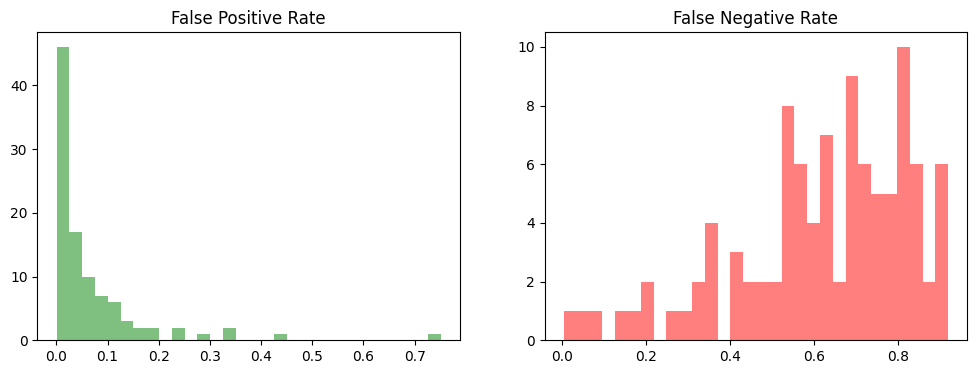

In [31]:
data = data_Sy2

Sy2_FPR = data['FPR']
Sy2_FNR = data['FNR']
Sy2_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

## Random Oversampling (ROS):

SRS Oversampling performance:

Error type: FPR
Mean: 0.06046673360235445
Variance: 0.0062405603212161015
Variance of estimate: 6.240560321216102e-05
Standard error: 0.00789972171738733
95% Confidence Interval:  [ 0.04498327903627529 ,  0.07595018816843362 ]
-----------------------------
Error type: FNR
Mean: 0.6204320276610138
Variance: 0.03974863024890589
Variance of estimate: 0.0003974863024890589
Standard error: 0.019937058521483527
95% Confidence Interval:  [ 0.581355392958906 ,  0.6595086623631216 ]
-----------------------------
Error type: Source time
Mean: 46.13460133040998
Variance: 36.374527845635534
Variance of estimate: 0.36374527845635535
Standard error: 0.603112989792423
95% Confidence Interval:  [ 44.95249987041683 ,  47.31670279040313 ]
-----------------------------


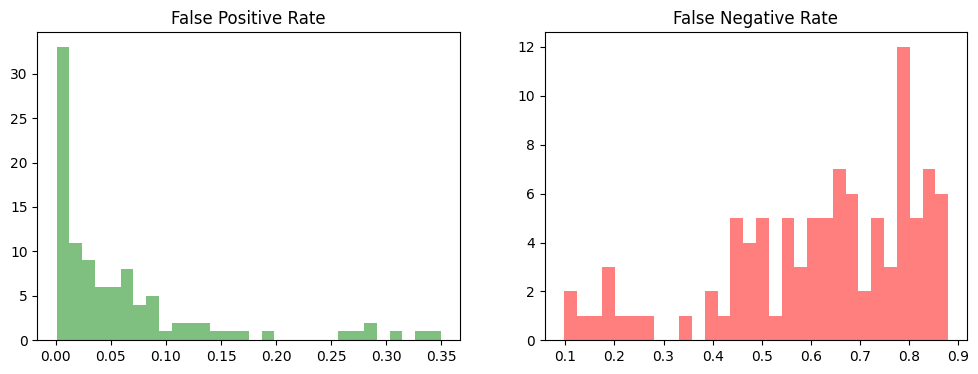

In [32]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']
SRS_ROS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Systematic Resampling performance:

In [33]:
data_Sy_ROS

,Unnamed: 0,Source time,FPR,TNR,FNR,TPR,Target time
0,0,36.675036,0.023301,0.976699,0.740783,0.259217,1.671912
1,1,35.367708,0.254373,0.745627,0.115783,0.884217,1.161786
2,2,47.703464,0.025738,0.974262,0.659562,0.340438,1.237285
3,3,36.282060,0.016777,0.983223,0.657834,0.342166,1.228638
4,4,39.698375,0.004373,0.995627,0.833525,0.166475,1.247540
...,...,...,...,...,...,...,...
95,45,51.294530,0.072484,0.927516,0.588710,0.411290,3.055822
96,46,49.584492,0.124606,0.875394,0.407834,0.592166,1.873747
97,47,66.481690,0.051047,0.948953,0.588710,0.411290,1.896121
98,48,50.759811,0.022297,0.977703,0.714286,0.285714,1.561452


Error type: FPR
Mean: 0.04692500720962143
Variance: 0.004473385028053446
Variance of estimate: 4.473385028053446e-05
Standard error: 0.006688336884497854
95% Confidence Interval:  [ 0.03381586691600563 ,  0.060034147503237226 ]
-----------------------------
Error type: FNR
Mean: 0.6594066820278802
Variance: 0.03310751212156604
Variance of estimate: 0.0003310751212156604
Standard error: 0.01819546979925664
95% Confidence Interval:  [ 0.6237435612213372 ,  0.6950698028344232 ]
-----------------------------
Error type: Source time
Mean: 46.60815512315994
Variance: 33.318145227799846
Variance of estimate: 0.33318145227799845
Standard error: 0.5772187213509264
95% Confidence Interval:  [ 45.47680642931212 ,  47.73950381700776 ]
-----------------------------


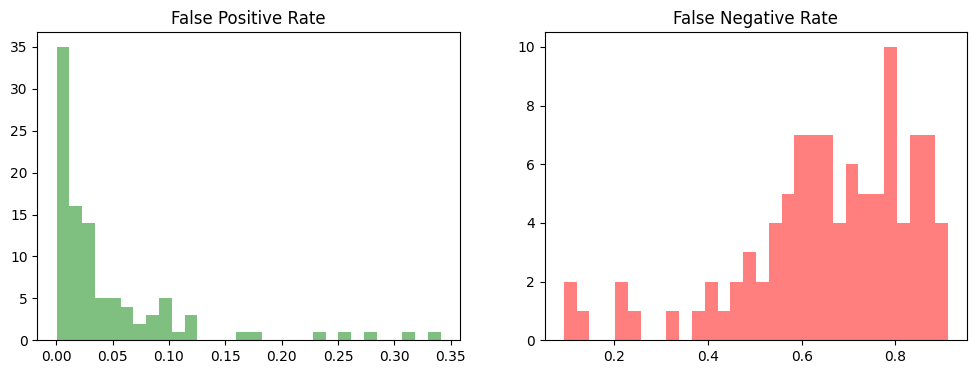

In [34]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']
Sy_ROS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

In [16]:
FPR = pd.DataFrame()

DF = FPR


DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sy2_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR
DF['Orig'] = orig_FPR
FPR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.124892,0.020433,0.071910,0.004373,0.272942,0.023301,0.013622
1,0.223114,0.002007,0.014482,0.006883,0.001362,0.254373,0.004947
2,0.032765,0.040436,0.001219,0.001075,0.077287,0.025738,0.014411
3,0.062303,0.028248,0.003872,0.067752,0.013622,0.016777,0.004804
4,0.054130,0.032836,0.293877,0.084600,0.006381,0.004373,0.003513
...,...,...,...,...,...,...,...
95,0.121881,0.013192,0.016418,0.073631,0.052122,0.072484,NaN
96,0.003226,0.007456,0.031331,0.043519,0.001362,0.124606,NaN
97,0.009607,0.039432,0.263048,0.018282,0.114425,0.051047,NaN
98,0.004588,0.023659,0.136866,0.004875,0.084026,0.022297,NaN


<Axes: title={'center': 'FPR'}>

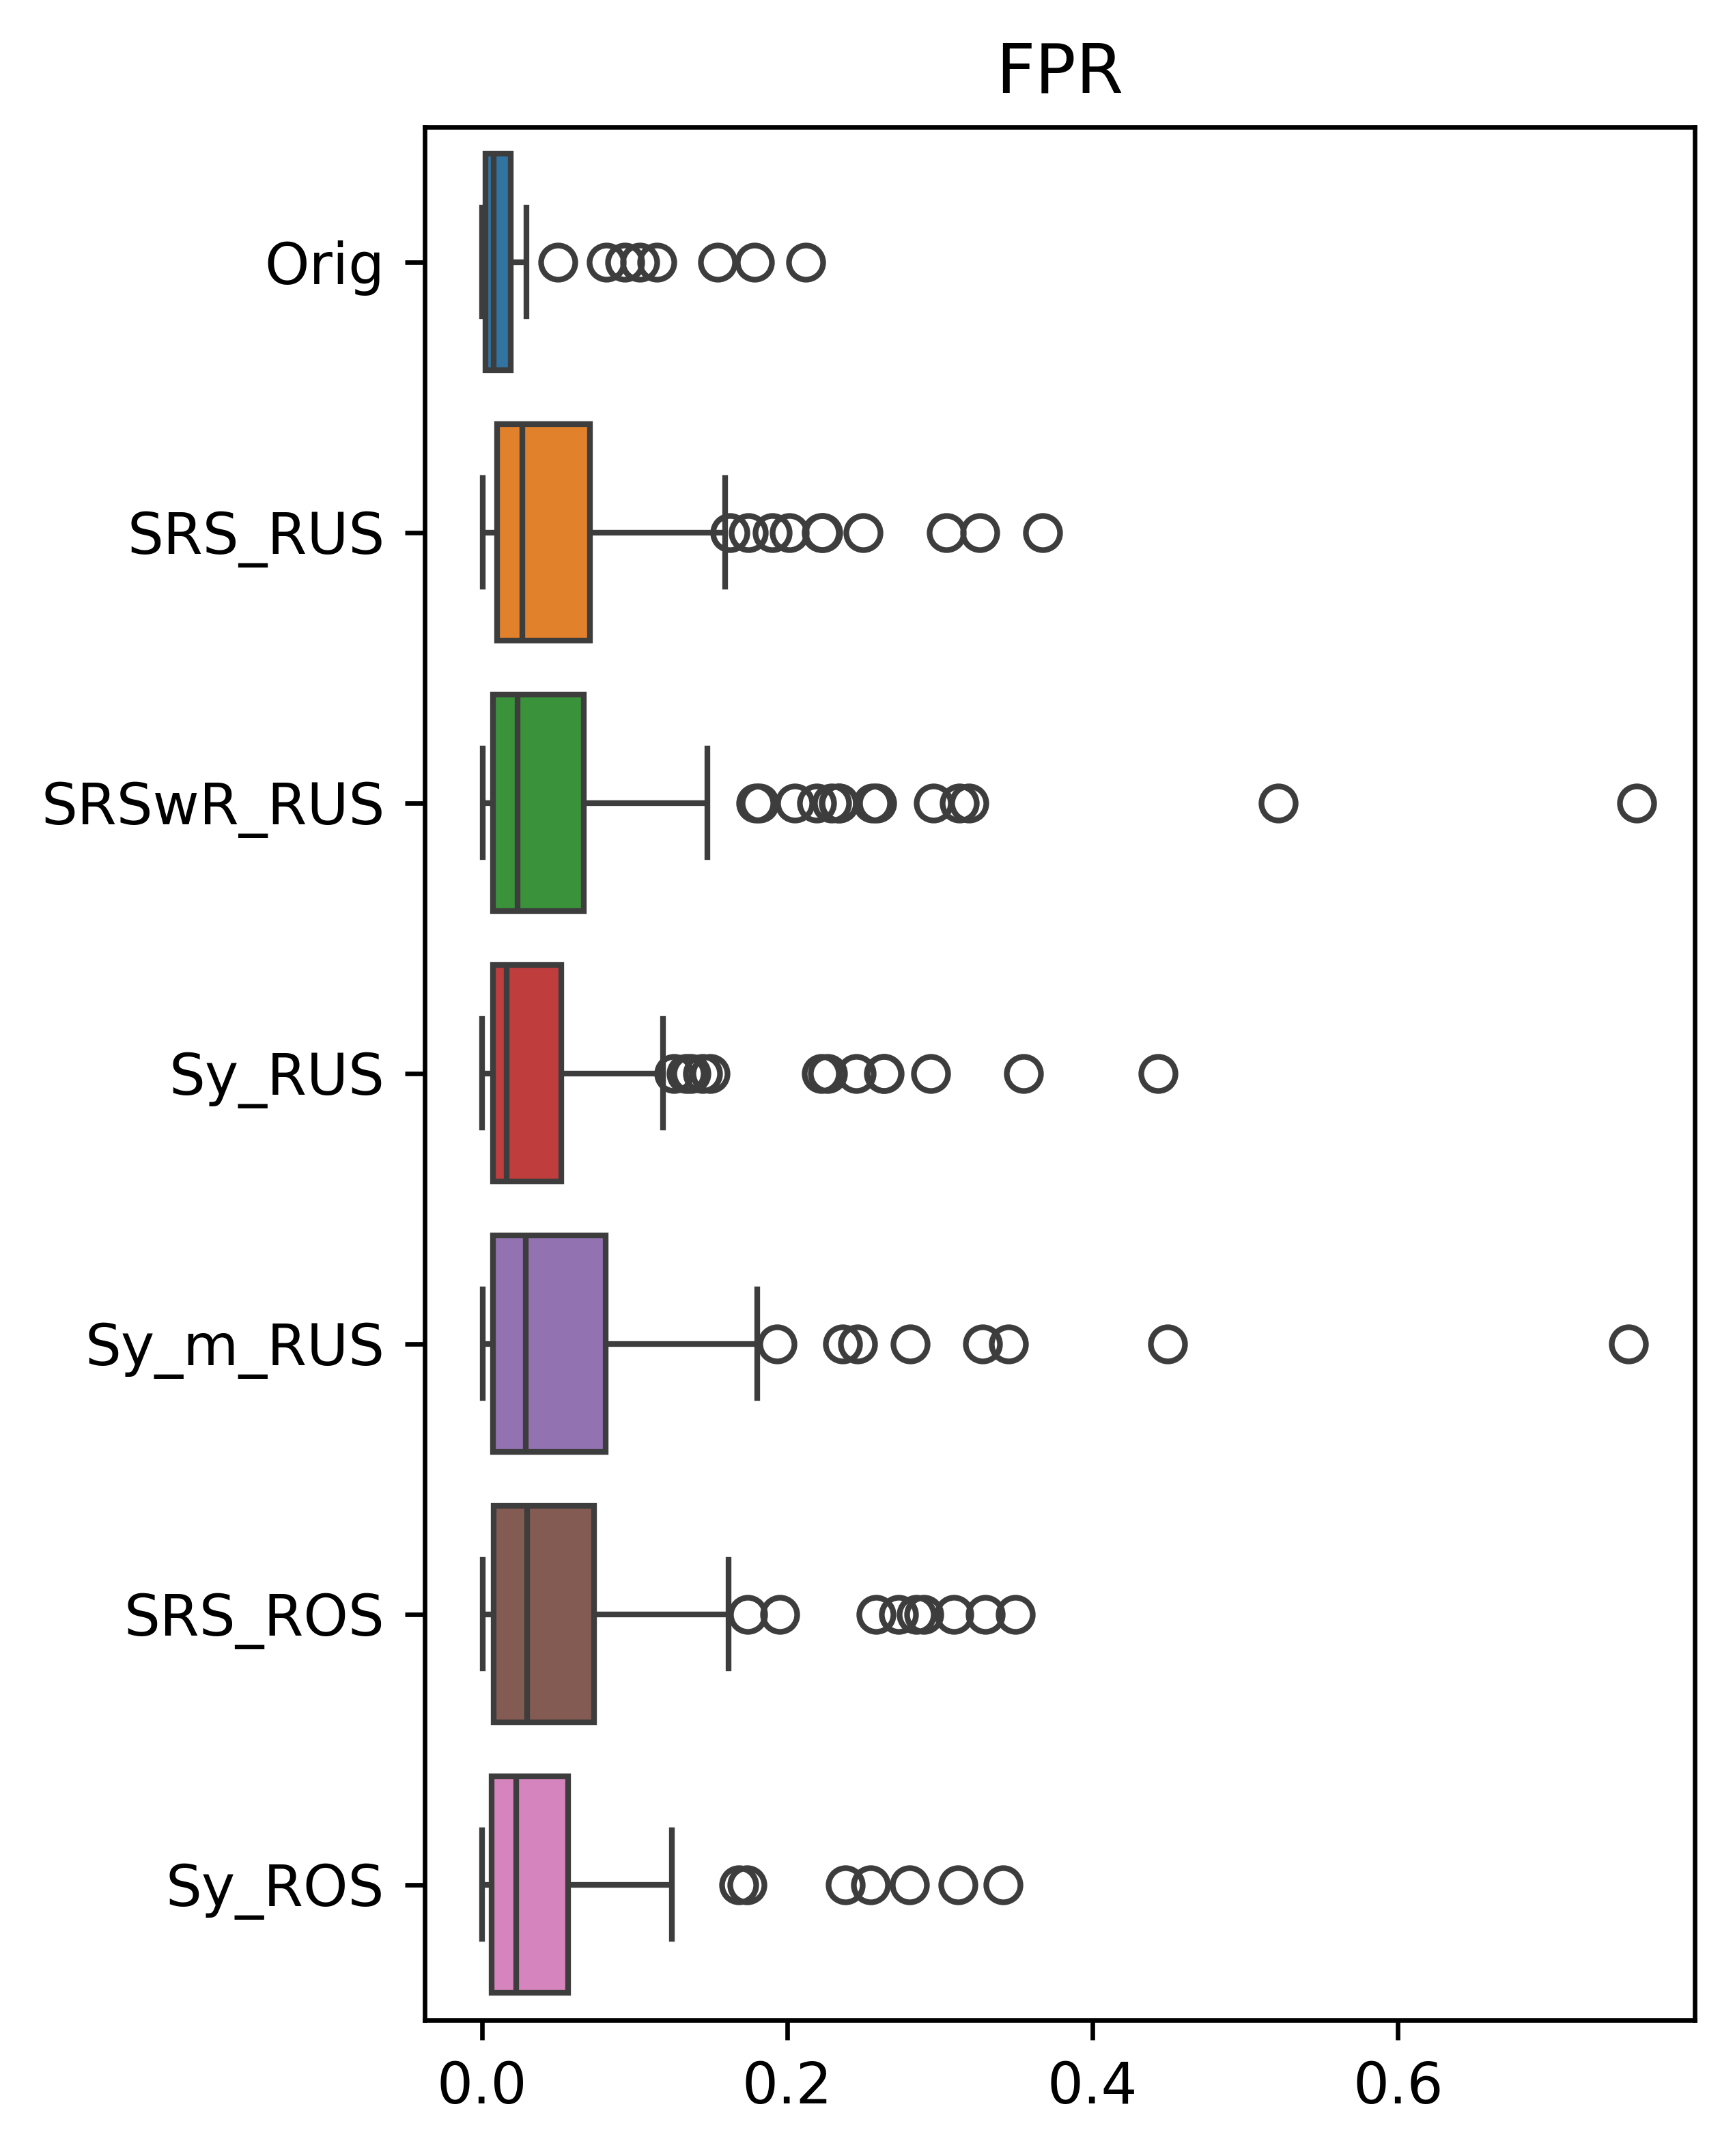

In [17]:
dataset = FPR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [19]:
FNR = pd.DataFrame()

DF = FNR


DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sy2_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR
DF['Orig'] = orig_FNR
FNR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.493664,0.691820,0.383641,0.820853,0.191244,0.740783,0.667051
1,0.364055,0.835253,0.751152,0.854839,0.869816,0.115783,0.828917
2,0.607143,0.581797,0.911290,0.904378,0.515553,0.659562,0.738479
3,0.661290,0.692396,0.853111,0.482719,0.730991,0.657834,0.819124
4,0.483871,0.679724,0.226959,0.509217,0.844470,0.833525,0.865207
...,...,...,...,...,...,...,...
95,0.314516,0.705069,0.724654,0.432028,0.513249,0.588710,NaN
96,0.860599,0.827189,0.641705,0.550115,0.880184,0.407834,NaN
97,0.714862,0.538018,0.289171,0.714286,0.354263,0.588710,NaN
98,0.771889,0.671659,0.283986,0.804147,0.592742,0.714286,NaN


<Axes: title={'center': 'FNR'}>

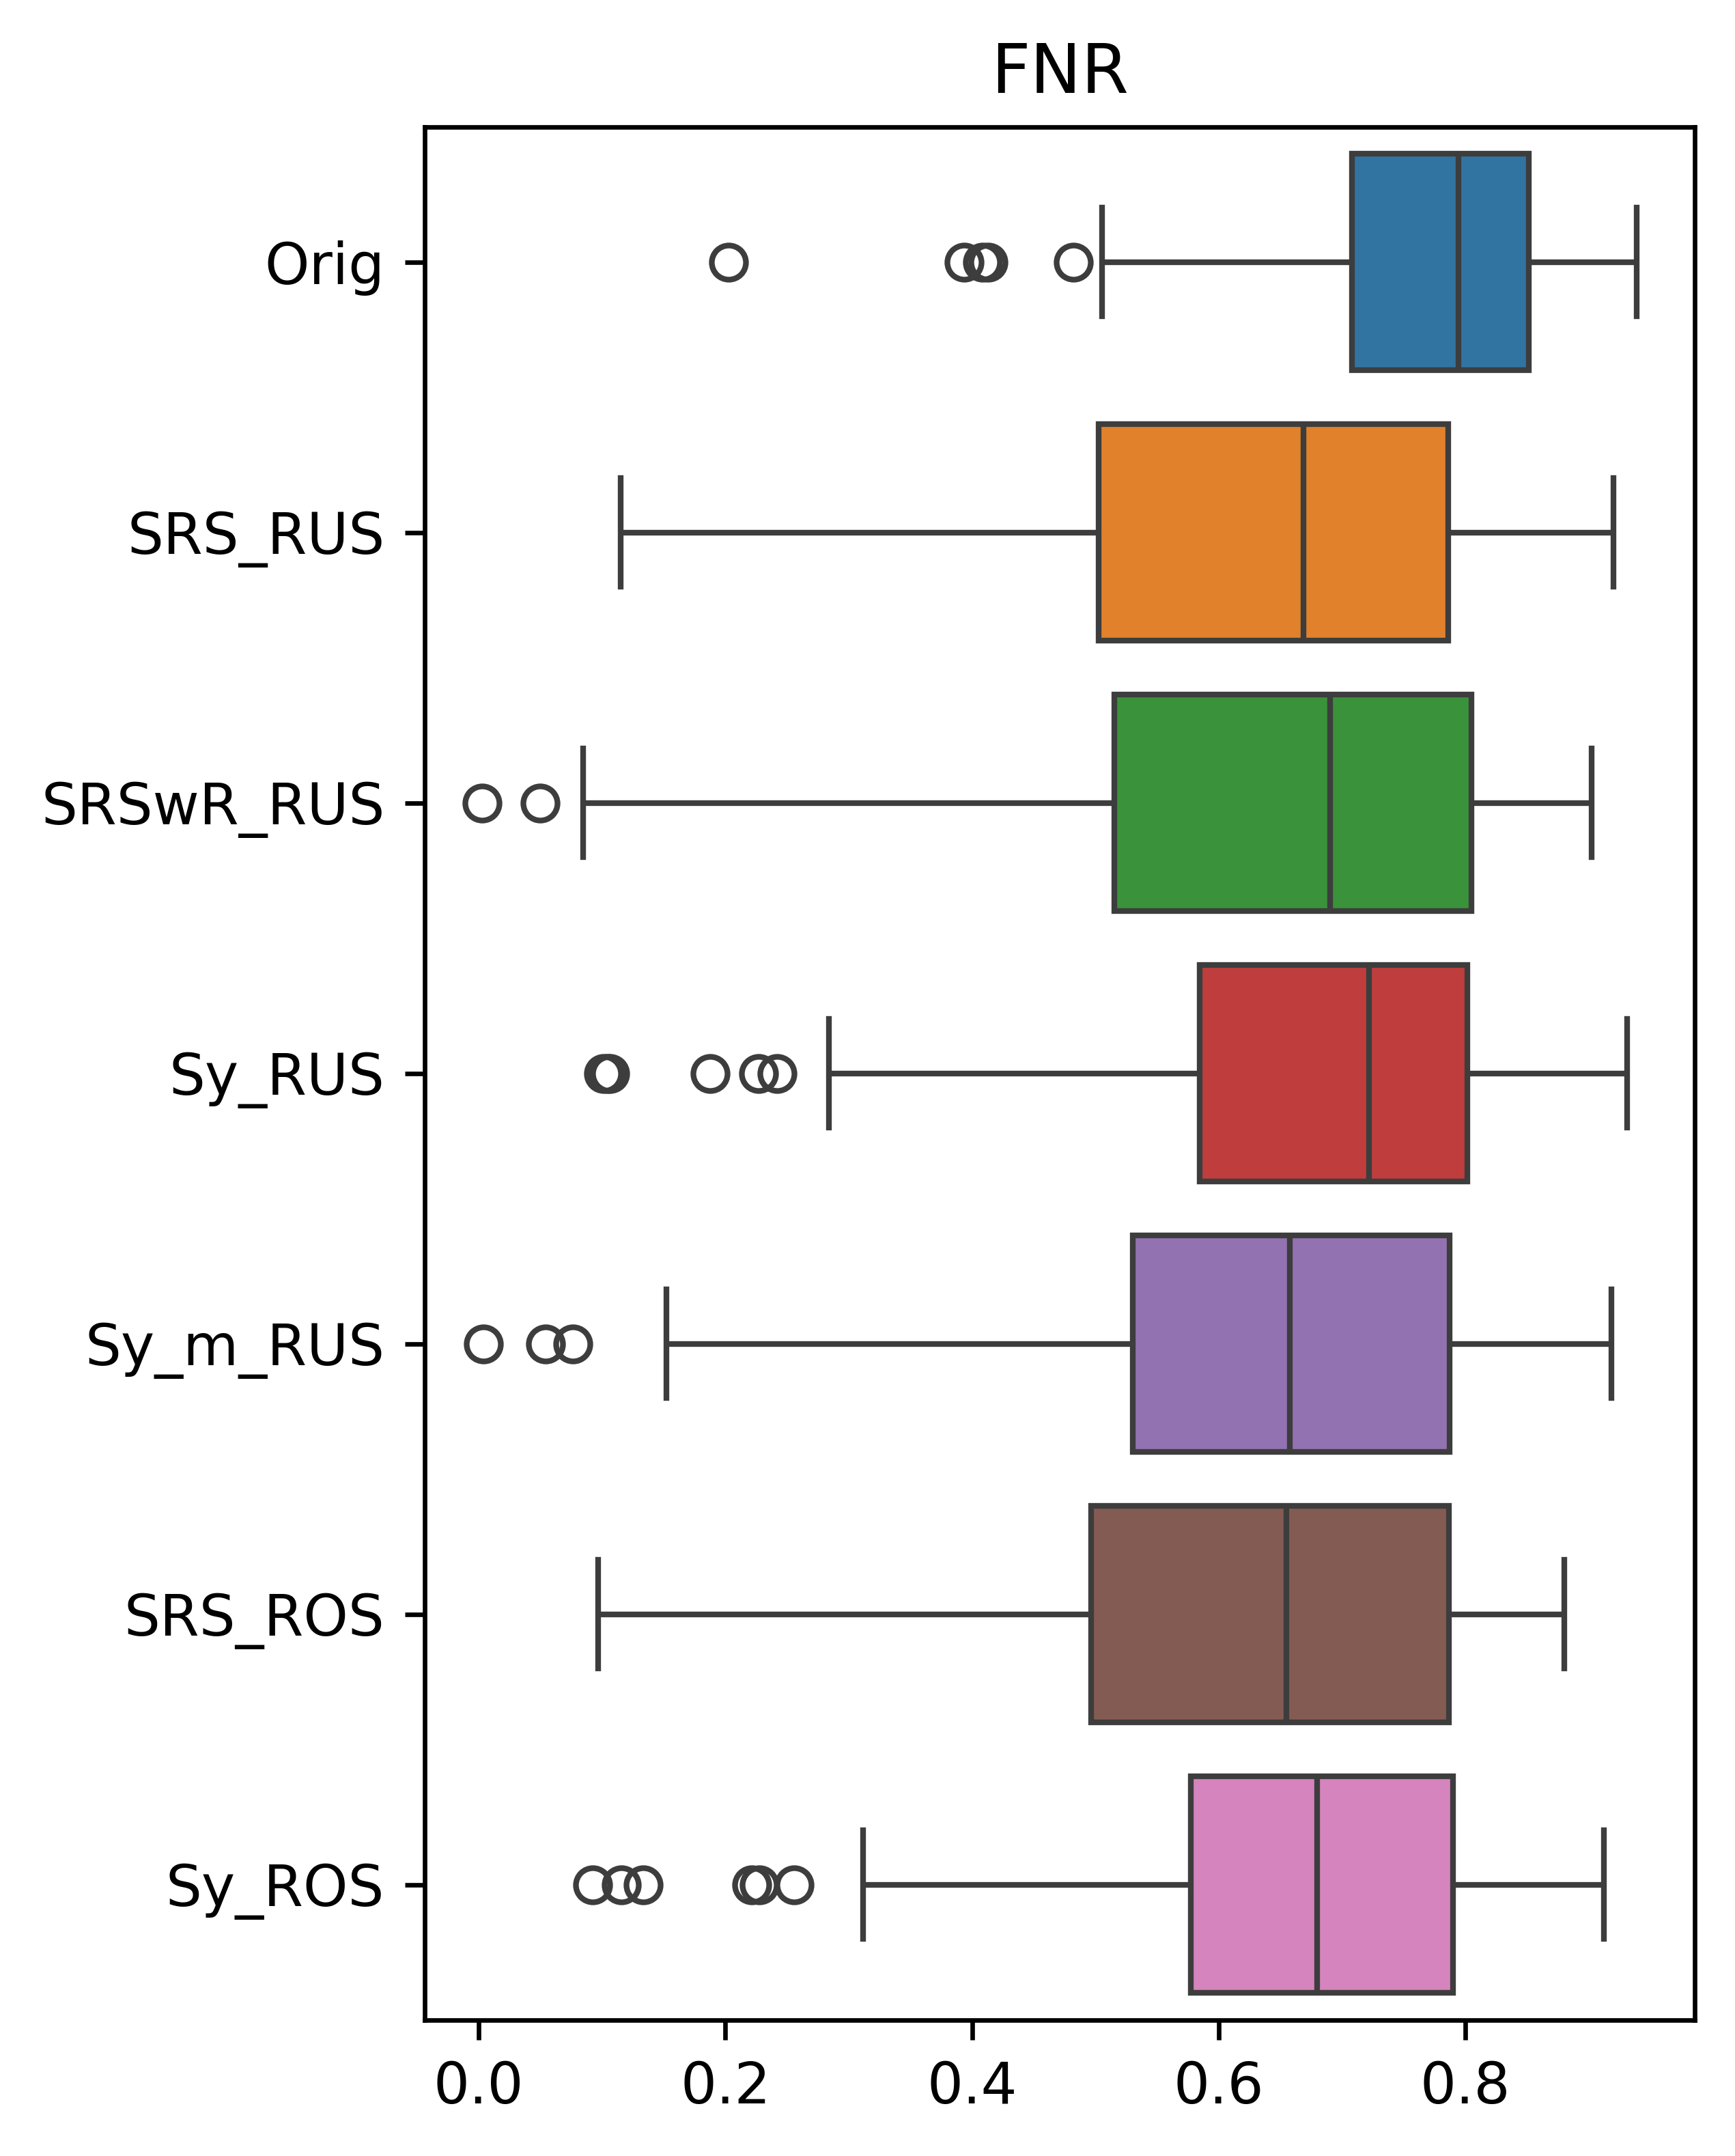

In [20]:
dataset = FNR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [21]:
Time = pd.DataFrame()

DF = Time


DF['SRS_RUS'] = SRS_time
DF['SRSwR_RUS'] = SRSwR_time
DF['Sy_RUS'] = Sy_time
DF['Sy_m_RUS'] = Sy2_time
DF['SRS_ROS'] = SRS_ROS_time
DF['Sy_ROS'] = Sy_ROS_time
DF['Orig'] = orig_time
DF

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,18.303071,18.703268,17.672478,15.716550,35.905611,36.675036,27.933277
1,16.633857,15.576718,16.676453,16.782630,38.175787,35.367708,28.712227
2,17.355280,18.464155,14.218497,17.794265,33.481807,47.703464,25.479594
3,18.062277,17.129171,15.735478,15.260581,35.318498,36.282060,27.635633
4,15.994438,15.696891,15.604301,17.468869,28.161099,39.698375,27.254139
...,...,...,...,...,...,...,...
95,26.469433,24.764700,25.082689,25.945357,53.229615,51.294530,NaN
96,30.762998,26.020629,26.371564,26.598388,57.608066,49.584492,NaN
97,29.523205,25.657654,26.124461,25.674172,52.815952,66.481690,NaN
98,27.659301,26.689288,26.349040,24.195498,64.207344,50.759811,NaN


<Axes: title={'center': 'Training Time'}>

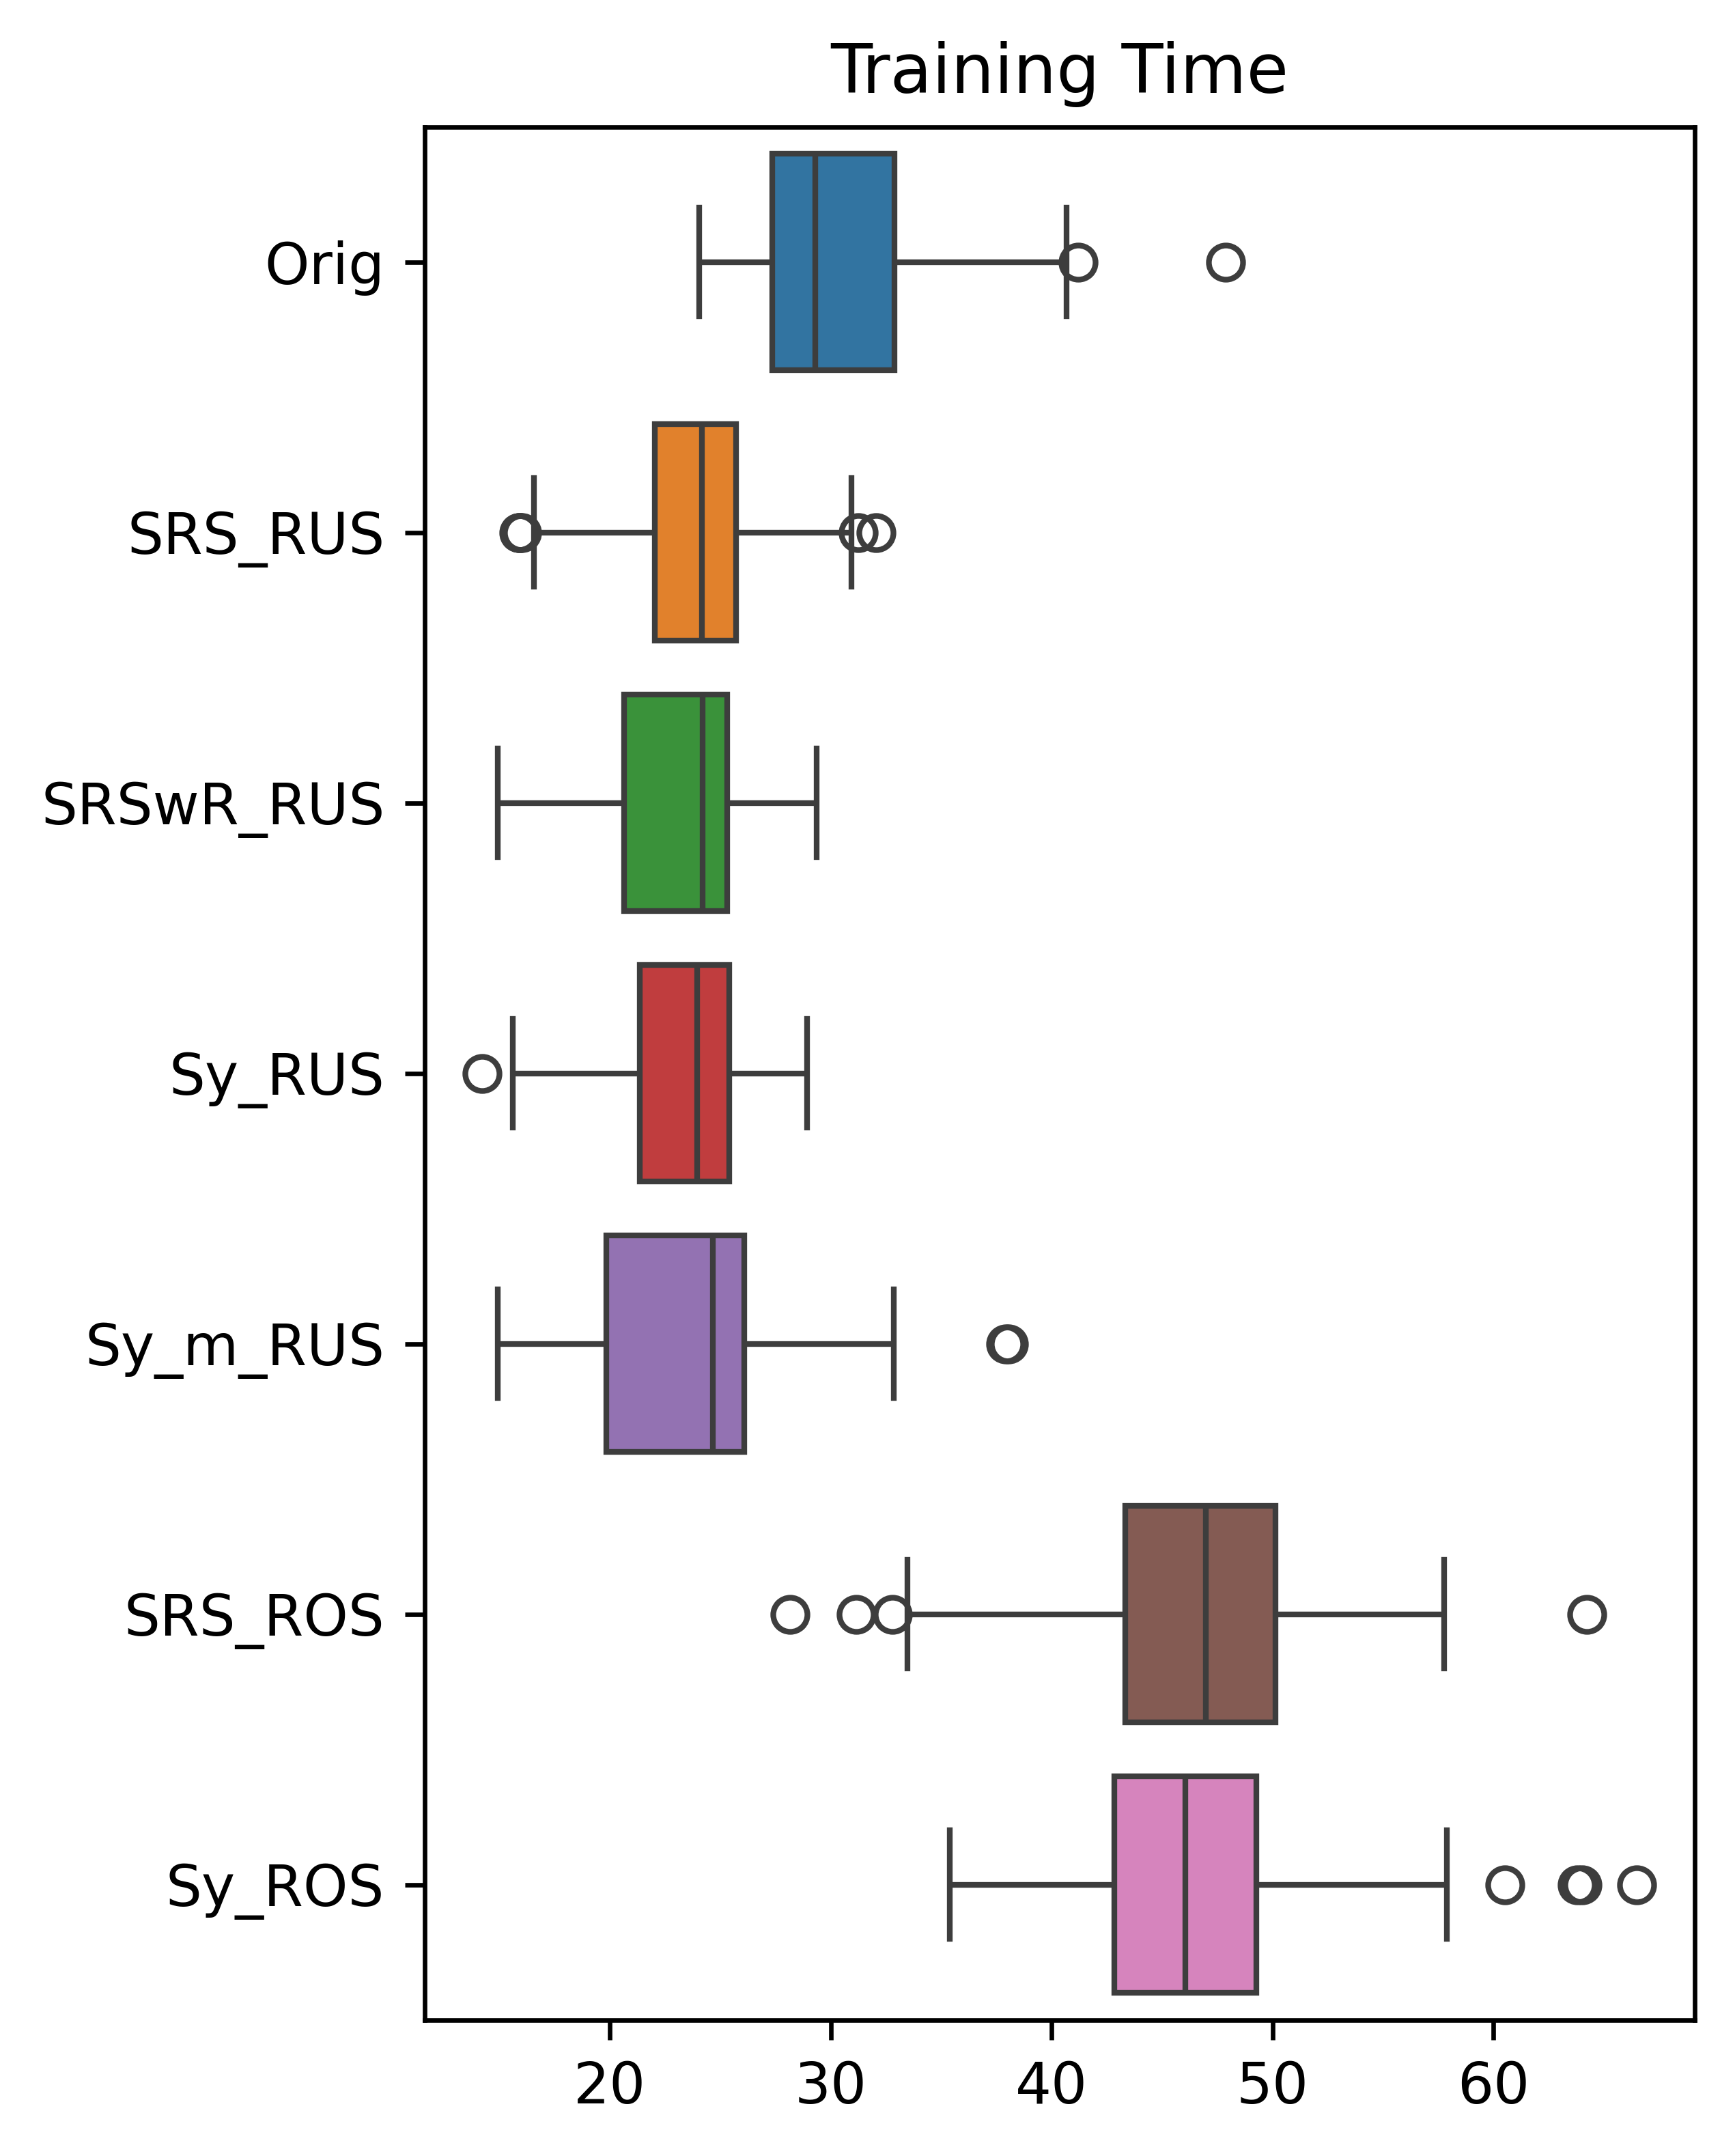

In [22]:
dataset = DF

plt.figure(figsize=(4,6), dpi=600)
plt.title('Training Time')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')